<a href="https://colab.research.google.com/github/ChapCunningham/Chap-Cunningham-Baseball-Data/blob/main/CLASS%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [ ]:
df2021  = pd.read_csv('/content/drive/MyDrive/statcast_2021.csv')
df2022  = pd.read_csv('/content/drive/MyDrive/statcast_2022.csv')
df2023  = pd.read_csv('/content/drive/MyDrive/statcast_2023.csv')
df2024 = pd.read_csv('/content/drive/MyDrive/Baseball DATA/statcast_2024.csv')

In [ ]:
# combine 2021-2024 df

df = pd.concat([df2021, df2022, df2023, df2024])

In [ ]:
# save df to /content/drive/MyDrive/Baseball DATA

df.to_csv('/content/drive/MyDrive/Baseball DATA/statcast_2021-2024.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Baseball DATA/statcast_2021-2024.csv')

In [ ]:
# keep columns : 'player_name', 'pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'spin_rate', 'pfx_x', 'pfx_z', 'extension'

df = df[['game_date','player_name','p_throws', 'pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate', 'pfx_x', 'pfx_z', 'release_extension', 'delta_run_exp']]

In [ ]:
df

,game_date,player_name,p_throws,pitch_type,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,delta_run_exp
0,2021-11-02,"Smith, Will",L,FF,93.7,1.39,6.72,2112.0,0.57,1.21,6.1,-0.138
1,2021-11-02,"Smith, Will",L,FF,92.9,1.38,6.72,2206.0,0.90,1.34,6.3,-0.047
2,2021-11-02,"Smith, Will",L,FF,93.1,1.35,6.73,2216.0,0.81,1.52,6.2,-0.042
3,2021-11-02,"Smith, Will",L,FF,94.6,1.31,6.73,2263.0,0.85,1.27,6.3,-0.387
4,2021-11-02,"Smith, Will",L,FF,93.6,1.31,6.80,2239.0,0.90,1.43,6.2,0.120
...,...,...,...,...,...,...,...,...,...,...,...,...
716767,2024-10-10,"Olson, Reese",R,FF,95.0,-2.79,5.90,2304.0,-0.67,1.35,5.9,0.463
716768,2024-10-10,"Olson, Reese",R,CH,86.6,-2.93,5.68,1983.0,-1.21,-0.05,5.9,0.021
716769,2024-10-10,"Olson, Reese",R,CH,86.8,-2.98,5.71,1993.0,-1.07,-0.34,5.9,0.000
716770,2024-10-10,"Olson, Reese",R,CU,78.6,-2.80,6.00,2504.0,0.71,-0.97,5.8,-0.049


In [ ]:
# Assuming df is your DataFrame
def classify_pitch(pitch_type):
    # Define pitch classifications based on pitch_type
    if pitch_type in ['FA']:
        return 'Fastball'
    elif pitch_type in ['SL', 'FC', 'ST', 'SV']:
        return 'Slider'
    elif pitch_type in ['FF']:
        return 'Four-Seam'
    elif pitch_type in ['SI']:
        return 'Two-Seam'
    elif pitch_type in ['CU', 'KC']:
        return 'Curve'
    elif pitch_type in ['FS', 'CH', 'FO', 'SC']:
        return 'OffSpeed'
    else:
        return 'Unknown'  # Just in case there's an unexpected pitch type

# Apply the classify_pitch function to create a new 'pitch_class' column
df['pitch_class'] = df['pitch_type'].apply(classify_pitch)

# Reorder columns to place 'pitch_class' after 'pitch_type'
cols = list(df.columns)
pitch_type_index = cols.index('pitch_type')
cols.insert(pitch_type_index + 1, cols.pop(cols.index('pitch_class')))
df = df[cols]

In [ ]:
df

,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,delta_run_exp
0,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.7,1.39,6.72,2112.0,0.57,1.21,6.1,-0.138
1,2021-11-02,"Smith, Will",L,FF,Four-Seam,92.9,1.38,6.72,2206.0,0.90,1.34,6.3,-0.047
2,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.1,1.35,6.73,2216.0,0.81,1.52,6.2,-0.042
3,2021-11-02,"Smith, Will",L,FF,Four-Seam,94.6,1.31,6.73,2263.0,0.85,1.27,6.3,-0.387
4,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.6,1.31,6.80,2239.0,0.90,1.43,6.2,0.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716767,2024-10-10,"Olson, Reese",R,FF,Four-Seam,95.0,-2.79,5.90,2304.0,-0.67,1.35,5.9,0.463
716768,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.6,-2.93,5.68,1983.0,-1.21,-0.05,5.9,0.021
716769,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.8,-2.98,5.71,1993.0,-1.07,-0.34,5.9,0.000
716770,2024-10-10,"Olson, Reese",R,CU,Curve,78.6,-2.80,6.00,2504.0,0.71,-0.97,5.8,-0.049


### MODELING BEGINS BELOW!!!!

In [ ]:
pitch_class_groups = df.groupby('pitch_class')

In [ ]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Display the result
print(nan_counts)

game_date                     0
player_name                   0
p_throws                      0
pitch_type                14581
pitch_class                   0
release_speed             14621
release_pos_x             14830
release_pos_z             14830
release_spin_rate         26932
pfx_x                     14637
pfx_z                     14626
release_extension         18705
delta_run_exp             34496
year                          0
pitch_type_primary         4715
primary_fastball_speed        0
primary_speed_diff        14612
primary_fastball_pfx_x        0
primary_fastball_pfx_z        0
pfx_x_diff                14626
pfx_z_diff                14616
dtype: int64


In [ ]:
# Define the columns where we want to fill NaN values
columns_to_fill = ['release_speed', 'release_pos_x', 'release_pos_z',
                   'release_spin_rate', 'pfx_x', 'pfx_z', 'release_extension', 'delta_run_exp']

# Group by player_name and pitch_type, and fill NaN values with the mean within each group
df_filled = df.copy()
df_filled[columns_to_fill] = df_filled.groupby(['player_name', 'pitch_type'])[columns_to_fill].transform(lambda x: x.fillna(x.mean()))

# Display the result
df_filled


,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,...,release_extension,delta_run_exp,year,pitch_type_primary,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff
0,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.7,1.39,6.72,2112.0,0.57,...,6.1,-0.138,2021,FF,93.7,0.0,0.57,1.21,0.00,0.00
1,2021-11-02,"Smith, Will",L,FF,Four-Seam,92.9,1.38,6.72,2206.0,0.90,...,6.3,-0.047,2021,FF,92.9,0.0,0.90,1.34,0.00,0.00
2,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.1,1.35,6.73,2216.0,0.81,...,6.2,-0.042,2021,FF,93.1,0.0,0.81,1.52,0.00,0.00
3,2021-11-02,"Smith, Will",L,FF,Four-Seam,94.6,1.31,6.73,2263.0,0.85,...,6.3,-0.387,2021,FF,94.6,0.0,0.85,1.27,0.00,0.00
4,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.6,1.31,6.80,2239.0,0.90,...,6.2,0.120,2021,FF,93.6,0.0,0.90,1.43,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921751,2024-10-10,"Olson, Reese",R,FF,Four-Seam,95.0,-2.79,5.90,2304.0,-0.67,...,5.9,0.463,2024,FF,95.0,0.0,-0.67,1.35,0.00,0.00
2921752,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.6,-2.93,5.68,1983.0,-1.21,...,5.9,0.021,2024,FF,95.0,-8.4,-0.67,1.35,-0.54,-1.40
2921753,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.8,-2.98,5.71,1993.0,-1.07,...,5.9,0.000,2024,FF,95.0,-8.2,-0.67,1.35,-0.40,-1.69
2921754,2024-10-10,"Olson, Reese",R,CU,Curve,78.6,-2.80,6.00,2504.0,0.71,...,5.8,-0.049,2024,FF,95.0,-16.4,-0.67,1.35,1.38,-2.32


In [ ]:
df.to_csv('/content/drive/MyDrive/Baseball DATA/CLEANED_statcast_21-24.csv', index=False)

In [ ]:
### CAN RUN THIS TO GET BACK TO CLEANED AND FILLED DF

df = pd.read_csv('/content/drive/MyDrive/Baseball DATA/CLEANED_statcast_21-24.csv')
df

,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,...,release_extension,delta_run_exp,year,pitch_type_primary,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff
0,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.7,-1.39,6.72,2112.0,-6.84,...,6.1,-0.138,2021,FF,93.7,0.0,-6.84,14.52,0.00,0.00
1,2021-11-02,"Smith, Will",L,FF,Four-Seam,92.9,-1.38,6.72,2206.0,-10.80,...,6.3,-0.047,2021,FF,92.9,0.0,-10.80,16.08,0.00,0.00
2,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.1,-1.35,6.73,2216.0,-9.72,...,6.2,-0.042,2021,FF,93.1,0.0,-9.72,18.24,0.00,0.00
3,2021-11-02,"Smith, Will",L,FF,Four-Seam,94.6,-1.31,6.73,2263.0,-10.20,...,6.3,-0.387,2021,FF,94.6,0.0,-10.20,15.24,0.00,0.00
4,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.6,-1.31,6.80,2239.0,-10.80,...,6.2,0.120,2021,FF,93.6,0.0,-10.80,17.16,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905438,2024-10-10,"Olson, Reese",R,FF,Four-Seam,95.0,-2.79,5.90,2304.0,-8.04,...,5.9,0.463,2024,FF,95.0,0.0,-8.04,16.20,0.00,0.00
2905439,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.6,-2.93,5.68,1983.0,-14.52,...,5.9,0.021,2024,FF,95.0,-8.4,-8.04,16.20,-6.48,-16.80
2905440,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.8,-2.98,5.71,1993.0,-12.84,...,5.9,0.000,2024,FF,95.0,-8.2,-8.04,16.20,-4.80,-20.28
2905441,2024-10-10,"Olson, Reese",R,CU,Curve,78.6,-2.80,6.00,2504.0,8.52,...,5.8,-0.049,2024,FF,95.0,-16.4,-8.04,16.20,16.56,-27.84


In [ ]:
import pandas as pd

# Convert 'game_date' to datetime to easily extract the year
df['game_date'] = pd.to_datetime(df['game_date'])

# Define the fastball types
fastball_types = ['Four-Seam', 'Two-Seam', 'Fastball']

# Step 1: Filter the fastballs and compute the most thrown pitch for each player and year
fastball_df = df[df['pitch_class'].isin(fastball_types)].copy()  # Make an explicit copy

# Create a 'year' column from 'game_date' for grouping
fastball_df['year'] = fastball_df['game_date'].dt.year

# Count the number of pitches per pitch_type for each player and year
fastball_counts = fastball_df.groupby(['player_name', 'year', 'pitch_type'])['pitch_type'].count().reset_index(name='count')

# Find the most thrown fastball for each player and year
primary_fastball = fastball_counts.loc[fastball_counts.groupby(['player_name', 'year'])['count'].idxmax()]

# Now add the 'year' column to the original df for merging purposes
df['year'] = df['game_date'].dt.year

# Merge the primary fastball info back into the original DataFrame on 'player_name' and 'year'
df = pd.merge(df, primary_fastball[['player_name', 'year', 'pitch_type']],
              on=['player_name', 'year'], suffixes=('', '_primary'), how='left')

# Step 2: Calculate the primary speed for each primary fastball
df['primary_fastball_speed'] = None  # Initialize the column

# Assign 'release_speed' where the pitch type matches the primary pitch type
df.loc[df['pitch_type'] == df['pitch_type_primary'], 'primary_fastball_speed'] = df['release_speed']

# Step 3: Forward and backward fill the 'primary_fastball_speed' for each player_name and year
df['primary_fastball_speed'] = df.groupby(['player_name', 'year'])['primary_fastball_speed'].ffill().bfill()

# Step 4: Calculate primary speed difference for non-primary fastballs
df['primary_speed_diff'] = df['release_speed'] - df['primary_fastball_speed']

# Set 'primary_speed_diff' to 0 for primary fastballs
df.loc[df['pitch_type'] == df['pitch_type_primary'], 'primary_speed_diff'] = 0

# Display the updated DataFrame
df


<ipython-input-22-98b85b3f1663>:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['primary_fastball_speed'] = df.groupby(['player_name', 'year'])['primary_fastball_speed'].ffill().bfill()


,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,delta_run_exp,year,pitch_type_primary,primary_fastball_speed,primary_speed_diff
0,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.7,1.39,6.72,2112.0,0.57,1.21,6.1,-0.138,2021,FF,93.7,0.0
1,2021-11-02,"Smith, Will",L,FF,Four-Seam,92.9,1.38,6.72,2206.0,0.90,1.34,6.3,-0.047,2021,FF,92.9,0.0
2,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.1,1.35,6.73,2216.0,0.81,1.52,6.2,-0.042,2021,FF,93.1,0.0
3,2021-11-02,"Smith, Will",L,FF,Four-Seam,94.6,1.31,6.73,2263.0,0.85,1.27,6.3,-0.387,2021,FF,94.6,0.0
4,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.6,1.31,6.80,2239.0,0.90,1.43,6.2,0.120,2021,FF,93.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921751,2024-10-10,"Olson, Reese",R,FF,Four-Seam,95.0,-2.79,5.90,2304.0,-0.67,1.35,5.9,0.463,2024,FF,95.0,0.0
2921752,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.6,-2.93,5.68,1983.0,-1.21,-0.05,5.9,0.021,2024,FF,95.0,-8.4
2921753,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.8,-2.98,5.71,1993.0,-1.07,-0.34,5.9,0.000,2024,FF,95.0,-8.2
2921754,2024-10-10,"Olson, Reese",R,CU,Curve,78.6,-2.80,6.00,2504.0,0.71,-0.97,5.8,-0.049,2024,FF,95.0,-16.4


In [ ]:
import pandas as pd

# Assuming the primary fastball information and speed differences are already computed and stored

# Step 1: Calculate the primary fastball's average pfx_x and pfx_z for each player_name and year
df['primary_fastball_pfx_x'] = df.loc[df['pitch_type'] == df['pitch_type_primary'], 'pfx_x']
df['primary_fastball_pfx_z'] = df.loc[df['pitch_type'] == df['pitch_type_primary'], 'pfx_z']

# Step 2: Forward fill and backward fill for each player_name and year
df['primary_fastball_pfx_x'] = df.groupby(['player_name', 'year'])['primary_fastball_pfx_x'].ffill().bfill()
df['primary_fastball_pfx_z'] = df.groupby(['player_name', 'year'])['primary_fastball_pfx_z'].ffill().bfill()

# Step 3: Calculate the differences (pfx_x_diff and pfx_z_diff)
df['pfx_x_diff'] = df['pfx_x'] - df['primary_fastball_pfx_x']
df['pfx_z_diff'] = df['pfx_z'] - df['primary_fastball_pfx_z']

# Step 4: Set the differences to 0 for primary fastballs
df.loc[df['pitch_type'] == df['pitch_type_primary'], ['pfx_x_diff', 'pfx_z_diff']] = 0

# Display the updated DataFrame
print(df[['player_name', 'pitch_type', 'primary_fastball_pfx_x', 'primary_fastball_pfx_z', 'pfx_x_diff', 'pfx_z_diff']].head())

# Save if necessary
# df.to_csv('updated_with_pfx_diffs.csv', index=False)


   player_name pitch_type  primary_fastball_pfx_x  primary_fastball_pfx_z  \
0  Smith, Will         FF                    0.57                    1.21   
1  Smith, Will         FF                    0.90                    1.34   
2  Smith, Will         FF                    0.81                    1.52   
3  Smith, Will         FF                    0.85                    1.27   
4  Smith, Will         FF                    0.90                    1.43   

   pfx_x_diff  pfx_z_diff  
0         0.0         0.0  
1         0.0         0.0  
2         0.0         0.0  
3         0.0         0.0  
4         0.0         0.0  


In [ ]:
df.columns.tolist()

['game_date',
 'player_name',
 'p_throws',
 'pitch_type',
 'pitch_class',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'release_spin_rate',
 'pfx_x',
 'pfx_z',
 'release_extension',
 'delta_run_exp',
 'year',
 'pitch_type_primary',
 'primary_fastball_speed',
 'primary_speed_diff',
 'primary_fastball_pfx_x',
 'primary_fastball_pfx_z',
 'pfx_x_diff',
 'pfx_z_diff']

In [ ]:
df.to_csv('/content/drive/MyDrive/Baseball DATA/CLEANED_statcast_21-24.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Group the data by 'pitch_class'
pitch_class_groups = df.groupby('pitch_class')

# Define the predictors and target
predictors = ['release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate',
              'pfx_x', 'pfx_z', 'release_extension', 'primary_speed_diff', 'pfx_x_diff', 'pfx_z_diff']
target = 'delta_run_exp'

# Function to train a random forest and display feature importances
def train_rf_model_for_class(df_group, pitch_class):
    # Split data into predictors and target
    X = df_group[predictors]
    y = df_group[target]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest model
    model = RandomForestRegressor(n_estimators = 10,random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = dict(zip(predictors, model.feature_importances_))

    # Display feature importance for the current pitch_class
    print(f"Feature Importances for {pitch_class}:")
    for feature, importance in feature_importances.items():
        print(f"{feature}: {importance:.4f}")

    # Evaluate the model
    r2_score = model.score(X_test, y_test)
    print(f"R2 Score for {pitch_class}: {r2_score:.4f}\n")

# Loop through each unique pitch_class and train a model
for pitch_class, group_data in pitch_class_groups:
    train_rf_model_for_class(group_data, pitch_class)


Feature Importances for Curve:
release_speed: 0.0936
release_pos_x: 0.1069
release_pos_z: 0.1089
release_spin_rate: 0.1203
pfx_x: 0.0990
pfx_z: 0.0981
release_extension: 0.0605
primary_speed_diff: 0.0999
pfx_x_diff: 0.1074
pfx_z_diff: 0.1055
R2 Score for Curve: -0.1444

Feature Importances for Fastball:
release_speed: 0.1575
release_pos_x: 0.1643
release_pos_z: 0.1526
release_spin_rate: 0.1588
pfx_x: 0.1465
pfx_z: 0.1343
release_extension: 0.0849
primary_speed_diff: 0.0001
pfx_x_diff: 0.0004
pfx_z_diff: 0.0006
R2 Score for Fastball: -0.2090

Feature Importances for Four-Seam:
release_speed: 0.1282
release_pos_x: 0.1576
release_pos_z: 0.1475
release_spin_rate: 0.1808
pfx_x: 0.1448
pfx_z: 0.1130
release_extension: 0.0933
primary_speed_diff: 0.0134
pfx_x_diff: 0.0105
pfx_z_diff: 0.0110
R2 Score for Four-Seam: -0.1596

Feature Importances for OffSpeed:
release_speed: 0.1000
release_pos_x: 0.1135
release_pos_z: 0.0998
release_spin_rate: 0.1272
pfx_x: 0.0956
pfx_z: 0.0971
release_extension: 

KeyboardInterrupt: 

### USING XGBOOST FOR FEATURE IMPORTANCE



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


Training XGBoost model for Curve
R² Score for Curve: -0.014232684814286412
RMSE for Curve: 0.22834713929823358



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

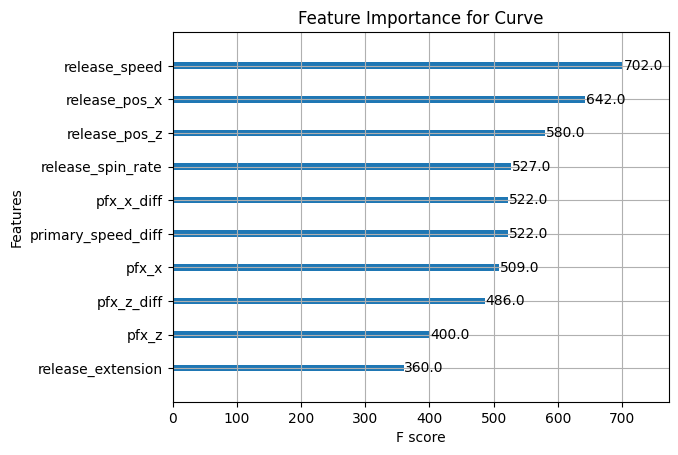

Feature Importances for Curve:
{'release_speed': 0.094512925, 'release_pos_x': 0.100347005, 'release_pos_z': 0.098654196, 'release_spin_rate': 0.10615276, 'pfx_x': 0.09825417, 'pfx_z': 0.10605751, 'release_extension': 0.09507028, 'primary_speed_diff': 0.09841381, 'pfx_x_diff': 0.10258647, 'pfx_z_diff': 0.09995085}
--------------------------------------------------
Training XGBoost model for Fastball
R² Score for Fastball: -0.2542216514494027
RMSE for Fastball: 0.46812753640152704



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

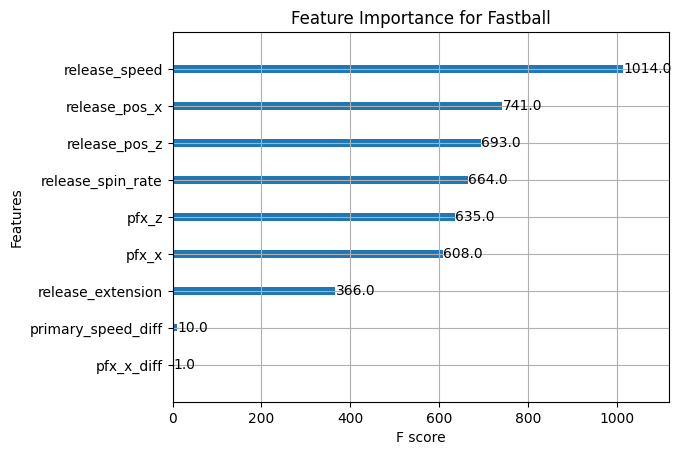

Feature Importances for Fastball:
{'release_speed': 0.12298816, 'release_pos_x': 0.1304211, 'release_pos_z': 0.13618049, 'release_spin_rate': 0.13771388, 'pfx_x': 0.14295144, 'pfx_z': 0.13888054, 'release_extension': 0.1430495, 'primary_speed_diff': 0.040866975, 'pfx_x_diff': 0.0069480147, 'pfx_z_diff': 0.0}
--------------------------------------------------
Training XGBoost model for Four-Seam
R² Score for Four-Seam: -0.0027966187502226347
RMSE for Four-Seam: 0.23441212866848563



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

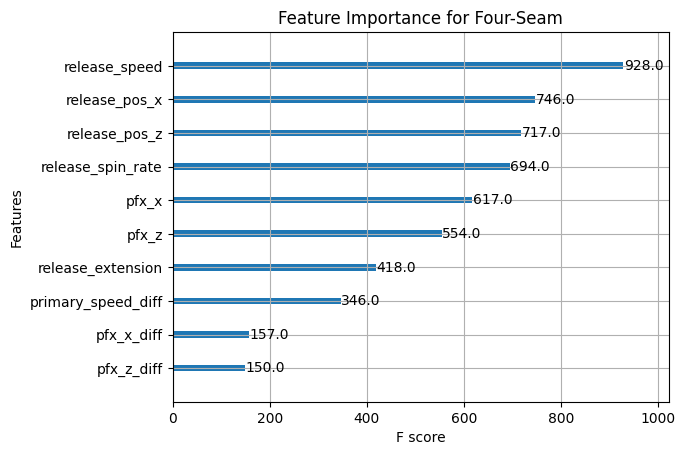

Feature Importances for Four-Seam:
{'release_speed': 0.09646716, 'release_pos_x': 0.1024604, 'release_pos_z': 0.101568, 'release_spin_rate': 0.102248326, 'pfx_x': 0.10994649, 'pfx_z': 0.12003527, 'release_extension': 0.10644808, 'primary_speed_diff': 0.08835866, 'pfx_x_diff': 0.08127476, 'pfx_z_diff': 0.09119287}
--------------------------------------------------
Training XGBoost model for OffSpeed
R² Score for OffSpeed: -0.009749895473338821
RMSE for OffSpeed: 0.24338694044757136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

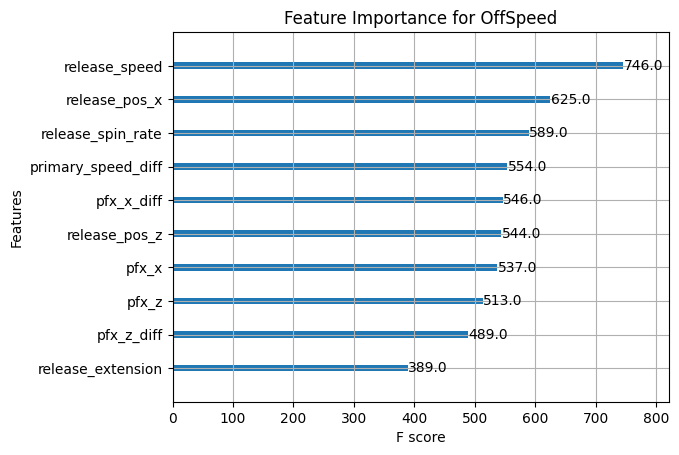

Feature Importances for OffSpeed:
{'release_speed': 0.10359085, 'release_pos_x': 0.09807544, 'release_pos_z': 0.102782115, 'release_spin_rate': 0.09622161, 'pfx_x': 0.1018854, 'pfx_z': 0.10923186, 'release_extension': 0.08855738, 'primary_speed_diff': 0.10166073, 'pfx_x_diff': 0.09850462, 'pfx_z_diff': 0.09949001}
--------------------------------------------------
Training XGBoost model for Slider
R² Score for Slider: -0.006563692466490689
RMSE for Slider: 0.24480366458452613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

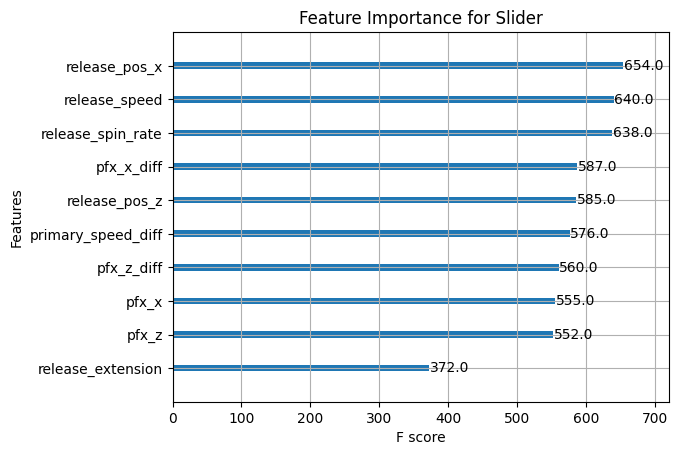

Feature Importances for Slider:
{'release_speed': 0.09698841, 'release_pos_x': 0.10549082, 'release_pos_z': 0.09993095, 'release_spin_rate': 0.100755535, 'pfx_x': 0.1047366, 'pfx_z': 0.100187, 'release_extension': 0.10683842, 'primary_speed_diff': 0.09190044, 'pfx_x_diff': 0.09526014, 'pfx_z_diff': 0.097911604}
--------------------------------------------------
Training XGBoost model for Two-Seam
R² Score for Two-Seam: -0.008780864905035157
RMSE for Two-Seam: 0.2531482596147794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

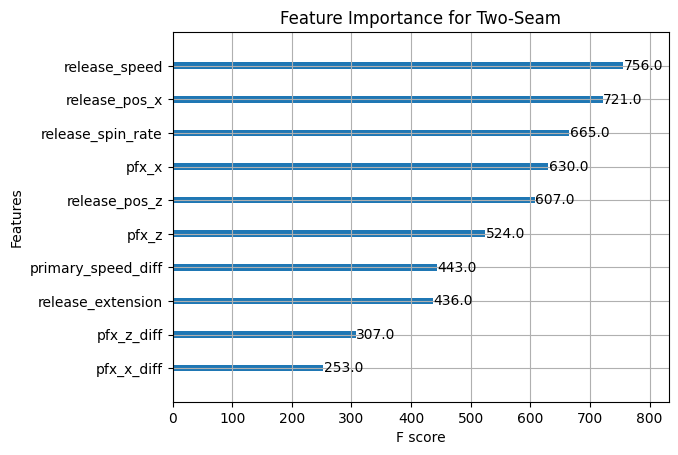

Feature Importances for Two-Seam:
{'release_speed': 0.08745249, 'release_pos_x': 0.10113028, 'release_pos_z': 0.106235966, 'release_spin_rate': 0.100987315, 'pfx_x': 0.10997858, 'pfx_z': 0.1095375, 'release_extension': 0.09434578, 'primary_speed_diff': 0.08976486, 'pfx_x_diff': 0.101630084, 'pfx_z_diff': 0.098937124}
--------------------------------------------------
Training XGBoost model for Unknown
R² Score for Unknown: -0.2003097549812325
RMSE for Unknown: 0.3563567881526462



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

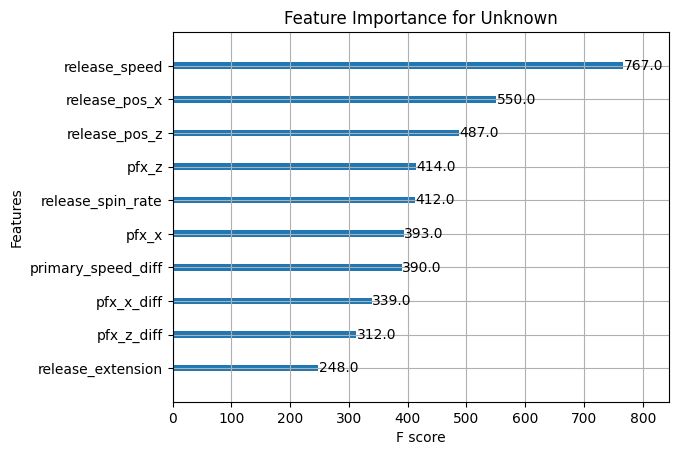

Feature Importances for Unknown:
{'release_speed': 0.06784739, 'release_pos_x': 0.08883375, 'release_pos_z': 0.083768174, 'release_spin_rate': 0.10822303, 'pfx_x': 0.11021923, 'pfx_z': 0.11426362, 'release_extension': 0.12657604, 'primary_speed_diff': 0.09973004, 'pfx_x_diff': 0.09522161, 'pfx_z_diff': 0.10531711}
--------------------------------------------------


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define the predictors
predictors = ['release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate',
              'pfx_x', 'pfx_z', 'release_extension', 'primary_speed_diff',
              'pfx_x_diff', 'pfx_z_diff']
target = 'delta_run_exp'

# Group the data by pitch_class
pitch_class_groups = df.groupby('pitch_class')

# Loop through each pitch_class and build independent models
for pitch_class, group_data in pitch_class_groups:
    print(f"Training XGBoost model for {pitch_class}")

    # Step 1: Prepare the data for this pitch_class
    X = group_data[predictors]
    y = group_data[target]

    # Step 2: Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Initialize and train the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Step 4: Make predictions
    y_pred = xgb_model.predict(X_test)

    # Step 5: Evaluate the model
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"R² Score for {pitch_class}: {r2}")
    print(f"RMSE for {pitch_class}: {rmse}\n")

    # Step 6: Plot and display feature importance
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(xgb_model, importance_type='weight', title=f"Feature Importance for {pitch_class}")
    plt.show()

    # Step 7: Optionally, print feature importances as a dictionary
    feature_importances = dict(zip(predictors, xgb_model.feature_importances_))
    print(f"Feature Importances for {pitch_class}:")
    print(feature_importances)
    print("-" * 50)


In [ ]:
# Sample the data to reduce the size for SHAP calculations
X_sample = X.sample(500, random_state=42)  # Adjust sample size as needed

# Use SHAP TreeExplainer with approximate=True
explainer = shap.TreeExplainer(xgb_model, X_sample, approximate=True)
shap_values = explainer.shap_values(X_sample)

# Generate SHAP dependence plot for release_pos_x
shap.dependence_plot('release_pos_x', shap_values, X_sample)


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np

# Create an empty column to store the predictions
df['predicted_delta_run_exp'] = np.nan

# Group the data by pitch_class
pitch_class_groups = df.groupby('pitch_class')

# Loop through each pitch_class and build independent models, then predict delta_run_exp for each row
for pitch_class, group_data in pitch_class_groups:
    print(f"Training and predicting for {pitch_class}")

    # Step 1: Prepare the data for this pitch_class
    X = group_data[predictors]
    y = group_data[target]

    # Step 2: Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Initialize and train the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Step 4: Predict delta_run_exp for the entire pitch_class group
    y_pred = xgb_model.predict(group_data[predictors])

    # Step 5: Assign the predictions back to the DataFrame
    df.loc[df['pitch_class'] == pitch_class, 'predicted_delta_run_exp'] = y_pred

# Display the updated DataFrame with predictions
df


Training and predicting for Curve
Training and predicting for Fastball
Training and predicting for Four-Seam
Training and predicting for OffSpeed
Training and predicting for Slider
Training and predicting for Two-Seam
Training and predicting for Unknown


,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,...,delta_run_exp,year,pitch_type_primary,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp
0,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.7,-1.39,6.72,2112.0,-6.84,...,-0.138,2021,FF,93.7,0.0,-6.84,14.52,0.00,0.00,0.015753
1,2021-11-02,"Smith, Will",L,FF,Four-Seam,92.9,-1.38,6.72,2206.0,-10.80,...,-0.047,2021,FF,92.9,0.0,-10.80,16.08,0.00,0.00,0.010744
2,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.1,-1.35,6.73,2216.0,-9.72,...,-0.042,2021,FF,93.1,0.0,-9.72,18.24,0.00,0.00,0.000837
3,2021-11-02,"Smith, Will",L,FF,Four-Seam,94.6,-1.31,6.73,2263.0,-10.20,...,-0.387,2021,FF,94.6,0.0,-10.20,15.24,0.00,0.00,0.015490
4,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.6,-1.31,6.80,2239.0,-10.80,...,0.120,2021,FF,93.6,0.0,-10.80,17.16,0.00,0.00,0.012079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905438,2024-10-10,"Olson, Reese",R,FF,Four-Seam,95.0,-2.79,5.90,2304.0,-8.04,...,0.463,2024,FF,95.0,0.0,-8.04,16.20,0.00,0.00,-0.003901
2905439,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.6,-2.93,5.68,1983.0,-14.52,...,0.021,2024,FF,95.0,-8.4,-8.04,16.20,-6.48,-16.80,0.012400
2905440,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.8,-2.98,5.71,1993.0,-12.84,...,0.000,2024,FF,95.0,-8.2,-8.04,16.20,-4.80,-20.28,0.004847
2905441,2024-10-10,"Olson, Reese",R,CU,Curve,78.6,-2.80,6.00,2504.0,8.52,...,-0.049,2024,FF,95.0,-16.4,-8.04,16.20,16.56,-27.84,0.008178


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import os

# Ensure that the folder path exists
save_path = '/content/drive/MyDrive/Baseball DATA'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# List of predictors used in the model
predictors = ['release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate',
              'pfx_x', 'pfx_z', 'release_extension', 'primary_speed_diff',
              'pfx_x_diff', 'pfx_z_diff']

# Loop through each pitch_class in your previous dataset (e.g., df)
for pitch_class, group_data in df.groupby('pitch_class'):
    print(f"Training model for {pitch_class}")

    # Prepare the data
    X = group_data[predictors]
    y = group_data['delta_run_exp']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Save the trained model as a JSON file
    model_file_path = os.path.join(save_path, f'xgb_model_{pitch_class}.json')
    xgb_model.save_model(model_file_path)

    print(f"Model for {pitch_class} saved at {model_file_path}")


Training model for Curve
Model for Curve saved at /content/drive/MyDrive/Baseball DATA/xgb_model_Curve.json
Training model for Fastball
Model for Fastball saved at /content/drive/MyDrive/Baseball DATA/xgb_model_Fastball.json
Training model for Four-Seam
Model for Four-Seam saved at /content/drive/MyDrive/Baseball DATA/xgb_model_Four-Seam.json
Training model for OffSpeed
Model for OffSpeed saved at /content/drive/MyDrive/Baseball DATA/xgb_model_OffSpeed.json
Training model for Slider
Model for Slider saved at /content/drive/MyDrive/Baseball DATA/xgb_model_Slider.json
Training model for Two-Seam
Model for Two-Seam saved at /content/drive/MyDrive/Baseball DATA/xgb_model_Two-Seam.json
Training model for Unknown
Model for Unknown saved at /content/drive/MyDrive/Baseball DATA/xgb_model_Unknown.json


In [ ]:
# Ensure predictions are in the DataFrame
if 'predicted_delta_run_exp' in df.columns:
    # Group by pitch_class and generate a descriptive summary of predicted_delta_run_exp
    summary_stats = df.groupby('pitch_class')['predicted_delta_run_exp'].describe()

    # Print the summary statistics
    print("Numerical Summary of predicted delta_run_exp for each pitch_class:")
    print(summary_stats)
else:
    print("No predicted values found. Make sure to run predictions first.")


Numerical Summary of predicted delta_run_exp for each pitch_class:
                count      mean       std       min       25%       50%  \
pitch_class                                                               
Curve        266765.0  0.000289  0.034558 -0.530420 -0.011605 -0.000576   
Fastball       3880.0  0.051214  0.287082 -0.855439 -0.066005  0.006377   
Four-Seam    963862.0  0.000526  0.018826 -0.491796 -0.007447  0.000222   
OffSpeed     378356.0  0.001545  0.030841 -0.470534 -0.010715  0.001083   
Slider       838696.0 -0.001551  0.021803 -0.378938 -0.009323 -0.001587   
Two-Seam     450561.0 -0.000422  0.026852 -0.681653 -0.009529 -0.000650   
Unknown        3323.0  0.027956  0.235109 -1.019369 -0.049646  0.002304   

                  75%       max  
pitch_class                      
Curve        0.009392  2.751066  
Fastball     0.081269  2.854638  
Four-Seam    0.007855  2.029946  
OffSpeed     0.011820  1.720867  
Slider       0.005205  1.596841  
Two-Seam     0.0076

In [ ]:
# Ensure predictions are in the DataFrame
if 'predicted_delta_run_exp' in df.columns:
    # Group by pitch_class and generate a descriptive summary of predicted_delta_run_exp
    summary_stats = df.groupby('pitch_type')['predicted_delta_run_exp'].describe()

    # Print the summary statistics
    print("Numerical Summary of predicted delta_run_exp for each pitch_class:")
    print(summary_stats)
else:
    print("No predicted values found. Make sure to run predictions first.")


Numerical Summary of predicted delta_run_exp for each pitch_class:
               count      mean       std       min       25%       50%  \
pitch_type                                                               
CH          316022.0  0.002178  0.030298 -0.470534 -0.009906  0.001644   
CS             332.0  0.019134  0.155093 -0.364221 -0.030808  0.006685   
CU          206773.0  0.000760  0.034641 -0.530420 -0.011042 -0.000122   
EP            1741.0  0.032527  0.277903 -1.019369 -0.066851  0.003164   
FA            3880.0  0.051214  0.287082 -0.855439 -0.066005  0.006377   
FC          218915.0 -0.001051  0.023283 -0.378938 -0.008985 -0.001369   
FF          963862.0  0.000526  0.018826 -0.491796 -0.007447  0.000222   
FO             936.0  0.003987  0.050684 -0.108756 -0.014854 -0.003702   
FS           61166.0 -0.001791  0.032905 -0.239451 -0.014808 -0.001938   
KC           59992.0 -0.001334  0.034220 -0.457918 -0.013523 -0.002243   
KN            1249.0  0.023566  0.181238 -0.4

In [ ]:
# Step 1: Calculate the mean predicted delta_run_exp for each pitch_class
pitch_class_means = df.groupby('pitch_class')['predicted_delta_run_exp'].mean()

# Step 2: Create the CLASS+ column based on the original formula
def calculate_class_plus(row, means):
    mean_value = means[row['pitch_class']]
    # Calculate the percentage difference from the mean
    score = 100 + ((mean_value - row['predicted_delta_run_exp']) / mean_value * 100)
    return score

# Apply the calculation for each row
df['CLASS+'] = df.apply(calculate_class_plus, axis=1, means=pitch_class_means)

# Display the raw CLASS+ scores
print(df[['pitch_class', 'predicted_delta_run_exp', 'CLASS+']].head())


  pitch_class  predicted_delta_run_exp       CLASS+
0   Four-Seam                 0.015753 -2796.844562
1   Four-Seam                 0.010744 -1843.824993
2   Four-Seam                 0.000837    40.689014
3   Four-Seam                 0.015490 -2746.713556
4   Four-Seam                 0.012079 -2097.826615


In [ ]:
# Step 3: Standardize the CLASS+ scores for consistency
overall_mean = df['CLASS+'].mean()
overall_std = df['CLASS+'].std()

# Standardize the CLASS+ scores to have a mean of 100
df['CLASS+'] = 100 + ((df['CLASS+'] - overall_mean) / overall_std * 10)

# Display the standardized CLASS+ scores
print(df[['pitch_class', 'predicted_delta_run_exp', 'CLASS+']].head())


  pitch_class  predicted_delta_run_exp     CLASS+
0   Four-Seam                 0.015753  94.174289
1   Four-Seam                 0.010744  96.090863
2   Four-Seam                 0.000837  99.880722
3   Four-Seam                 0.015490  94.275105
4   Four-Seam                 0.012079  95.580052


In [ ]:
# mean CLASS+ by player_name



,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,...,year,pitch_type_primary,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,CLASS+
2689215,2024-08-01,"Rogers, Trevor",L,SI,Two-Seam,93.2,-2.39,5.57,2387.00000,-19.20,...,2024,FF,88.6,4.6,-10.32,14.88,-8.88,-8.64,2.093545,1098.849948
2149961,2023-04-08,"Stripling, Ross",R,SI,Two-Seam,88.2,-1.12,6.83,1689.00000,-14.64,...,2023,FF,91.0,-2.8,-3.24,19.08,-11.40,-9.12,2.089680,1097.006517
2666298,2024-08-07,"Warren, Will",R,SI,Two-Seam,94.2,-2.35,5.55,2521.00000,-21.12,...,2024,FF,93.2,1.0,-9.00,16.08,-12.12,-11.76,1.750221,935.079794
2895105,2024-09-27,"Manaea, Sean",L,SI,Two-Seam,94.2,-4.01,4.91,1978.00000,-11.64,...,2024,SI,94.2,0.0,-11.64,10.44,0.00,0.00,1.469340,801.095735
1529518,2023-09-16,"Suter, Brent",L,SI,Two-Seam,90.1,-3.42,6.20,2135.51372,-7.32,...,2023,FF,84.9,5.2,5.16,11.52,-12.48,-1.32,1.456506,794.973882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738674,2022-10-05,"Fedde, Erick",R,CU,Curve,78.5,-1.77,5.39,2530.00000,14.16,...,2022,SI,91.4,-12.9,-10.32,11.76,24.48,-13.08,1.727814,-1100.349918
1798885,2023-07-07,"Maton, Phil",R,CU,Curve,74.1,-1.38,5.46,3238.00000,18.36,...,2023,SI,87.0,-12.9,-11.64,9.72,30.00,-18.84,1.807960,-1156.037789
662391,2021-04-16,"Thielbar, Caleb",L,CU,Curve,69.2,-0.67,6.20,2388.00000,11.52,...,2021,FF,89.6,-20.4,-2.04,20.88,13.56,-39.00,1.834716,-1174.628906
2473024,2024-06-09,"Maton, Phil",R,CU,Curve,75.1,-1.11,5.16,3251.00000,21.72,...,2024,SI,86.0,-10.9,-15.00,8.40,36.72,-17.40,2.464723,-1612.382190


In [ ]:
# Ensure predictions are in the DataFrame
if 'predicted_delta_run_exp' in df.columns:
    # Group by pitch_class and generate a descriptive summary of predicted_delta_run_exp
    summary_stats = df.groupby('pitch_class')['CLASS+'].describe()

    # Print the summary statistics
    print("Numerical Summary of predicted delta_run_exp for each pitch_class:")
    print(summary_stats)
else:
    print("No predicted values found. Make sure to run predictions first.")


Numerical Summary of predicted delta_run_exp for each pitch_class:
                count   mean   std         min        25%         50%  \
pitch_class                                                             
Curve        266765.0  100.0  10.0 -695.986387  97.365977  100.250432   
Fastball       3880.0  100.0  10.0    2.347481  98.953085  101.561827   
Four-Seam    963862.0  100.0  10.0 -977.984028  96.106968  100.161126   
OffSpeed     378356.0  100.0  10.0 -457.475901  96.668368  100.149920   
Slider       838696.0  100.0  10.0 -633.097622  96.901255  100.016556   
Two-Seam     450561.0  100.0  10.0 -679.822279  97.001716  100.084996   
Unknown        3323.0  100.0  10.0  -24.118750  98.928130  101.091052   

                    75%         max  
pitch_class                          
Curve        103.441964  253.570193  
Fastball     104.083148  131.581718  
Four-Seam    104.235079  361.510830  
OffSpeed     103.975313  253.067851  
Slider       103.564364  273.087156  
Two-Seam 

In [ ]:
import numpy as np

# Step 1: Calculate the mean and standard deviation of predicted delta_run_exp for each pitch_class
pitch_class_stats = df.groupby('pitch_class')['predicted_delta_run_exp'].agg(['mean', 'std'])

# Define the target standard deviation range
min_std, max_std = 10, 25

# Step 2: Create the CLASS+ column based on rescaling
def calculate_class_plus_rescaled(row, stats):
    mean_value = stats.loc[row['pitch_class'], 'mean']
    std_value = stats.loc[row['pitch_class'], 'std']

    # Scale the standard deviation into the desired range (between 10 and 25)
    if std_value > 0:
        scaling_factor = ((max_std - min_std) / (std_value - min_std)) * (std_value - min_std) + min_std
        score = 100 + (row['predicted_delta_run_exp'] - mean_value) / std_value * scaling_factor
    else:
        score = 100  # If std is 0, assign a neutral score of 100

    return score

# Apply the rescaled CLASS+ calculation for each row
df['CLASS+'] = df.apply(calculate_class_plus_rescaled, axis=1, stats=pitch_class_stats)

# Display the updated DataFrame with the CLASS+ column
print(df[['pitch_class', 'predicted_delta_run_exp', 'CLASS+']].head())


  pitch_class  predicted_delta_run_exp      CLASS+
0   Four-Seam                 0.015753  120.221435
1   Four-Seam                 0.010744  113.568878
2   Four-Seam                 0.000837  100.414021
3   Four-Seam                 0.015490  119.871496
4   Four-Seam                 0.012079  115.341938


In [ ]:
import numpy as np

# Step 1: Calculate the mean and standard deviation for each pitch_class
pitch_class_stats = df.groupby('pitch_class')['predicted_delta_run_exp'].agg(['mean', 'std'])

# Step 2: Create the CLASS+ score with mean = 100 and std = 10, inverted for lower predicted run values
def calculate_class_plus(row, stats):
    mean_value = stats.loc[row['pitch_class'], 'mean']
    std_value = stats.loc[row['pitch_class'], 'std']

    # Standardize the predicted_delta_run_exp to z-score
    if std_value > 0:
        z_score = (row['predicted_delta_run_exp'] - mean_value) / std_value
        # Rescale to have mean 100 and std 10, and invert to give higher scores for lower delta_run_exp
        class_plus_score = 100 - z_score * 10
    else:
        class_plus_score = 100  # If std is 0, assign a neutral score of 100

    return class_plus_score

# Apply the CLASS+ calculation for each row
df['CLASS+'] = df.apply(calculate_class_plus, axis=1, stats=pitch_class_stats)

# Display the updated DataFrame with the CLASS+ column
df


,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,...,year,pitch_type_primary,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,CLASS+
0,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.7,-1.39,6.72,2112.0,-6.84,...,2021,FF,93.7,0.0,-6.84,14.52,0.00,0.00,0.015753,91.911426
1,2021-11-02,"Smith, Will",L,FF,Four-Seam,92.9,-1.38,6.72,2206.0,-10.80,...,2021,FF,92.9,0.0,-10.80,16.08,0.00,0.00,0.010744,94.572449
2,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.1,-1.35,6.73,2216.0,-9.72,...,2021,FF,93.1,0.0,-9.72,18.24,0.00,0.00,0.000837,99.834392
3,2021-11-02,"Smith, Will",L,FF,Four-Seam,94.6,-1.31,6.73,2263.0,-10.20,...,2021,FF,94.6,0.0,-10.20,15.24,0.00,0.00,0.015490,92.051402
4,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.6,-1.31,6.80,2239.0,-10.80,...,2021,FF,93.6,0.0,-10.80,17.16,0.00,0.00,0.012079,93.863225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905438,2024-10-10,"Olson, Reese",R,FF,Four-Seam,95.0,-2.79,5.90,2304.0,-8.04,...,2024,FF,95.0,0.0,-8.04,16.20,0.00,0.00,-0.003901,102.351158
2905439,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.6,-2.93,5.68,1983.0,-14.52,...,2024,FF,95.0,-8.4,-8.04,16.20,-6.48,-16.80,0.012400,96.480384
2905440,2024-10-10,"Olson, Reese",R,CH,OffSpeed,86.8,-2.98,5.71,1993.0,-12.84,...,2024,FF,95.0,-8.2,-8.04,16.20,-4.80,-20.28,0.004847,98.929364
2905441,2024-10-10,"Olson, Reese",R,CU,Curve,78.6,-2.80,6.00,2504.0,8.52,...,2024,FF,95.0,-16.4,-8.04,16.20,16.56,-27.84,0.008178,97.717292


In [ ]:
import numpy as np

# Step 1: Filter to include only pitch_class instances with 50+ pitches in a given year
pitch_counts = df.groupby(['pitch_class', 'year']).size().reset_index(name='pitch_count')
valid_pitch_classes = pitch_counts[pitch_counts['pitch_count'] >= 50]

# Merge this filtered list back to the original DataFrame to keep only the rows with sufficient pitch counts
df_filtered = df.merge(valid_pitch_classes[['pitch_class', 'year']], on=['pitch_class', 'year'], how='inner')

# Step 2: Calculate the mean and standard deviation for each pitch_class by year using the filtered data
pitch_class_stats = df_filtered.groupby(['pitch_class', 'year'])['predicted_delta_run_exp'].agg(['mean', 'std'])

# Step 3: Define the CLASS+ score calculation
def calculate_class_plus(row, stats):
    mean_value = stats.loc[(row['pitch_class'], row['year']), 'mean']
    std_value = stats.loc[(row['pitch_class'], row['year']), 'std']

    if std_value > 0:
        z_score = (row['predicted_delta_run_exp'] - mean_value) / std_value
        class_plus_score = 100 - z_score * 10  # Inverted scale
    else:
        class_plus_score = 100  # Neutral score if std is 0

    return class_plus_score

# Step 4: Apply CLASS+ calculation only to filtered rows and assign directly to the original DataFrame
df['CLASS+'] = df.apply(
    lambda row: calculate_class_plus(row, pitch_class_stats) if (row['pitch_class'], row['year']) in pitch_class_stats.index else np.nan,
    axis=1
)

# Display the updated DataFrame
df.head()


,game_date,player_name,p_throws,pitch_type,pitch_class,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,...,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,CLASS+_x,CLASS+_y,CLASS+
0,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.7,-1.39,6.72,2112.0,-6.84,...,93.7,0.0,-6.84,14.52,0.0,0.0,0.015753,91.911426,92.193732,92.181077
1,2021-11-02,"Smith, Will",L,FF,Four-Seam,92.9,-1.38,6.72,2206.0,-10.80,...,92.9,0.0,-10.80,16.08,0.0,0.0,0.010744,94.572449,94.877423,94.868608
2,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.1,-1.35,6.73,2216.0,-9.72,...,93.1,0.0,-9.72,18.24,0.0,0.0,0.000837,99.834392,100.184191,100.182970
3,2021-11-02,"Smith, Will",L,FF,Four-Seam,94.6,-1.31,6.73,2263.0,-10.20,...,94.6,0.0,-10.20,15.24,0.0,0.0,0.015490,92.051402,92.334900,92.322447
4,2021-11-02,"Smith, Will",L,FF,Four-Seam,93.6,-1.31,6.80,2239.0,-10.80,...,93.6,0.0,-10.80,17.16,0.0,0.0,0.012079,93.863225,94.162158,94.152319


In [ ]:
df.columns.tolist()

['game_date',
 'player_name',
 'p_throws',
 'pitch_type',
 'pitch_class',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'release_spin_rate',
 'pfx_x',
 'pfx_z',
 'release_extension',
 'delta_run_exp',
 'year',
 'pitch_type_primary',
 'primary_fastball_speed',
 'primary_speed_diff',
 'primary_fastball_pfx_x',
 'primary_fastball_pfx_z',
 'pfx_x_diff',
 'pfx_z_diff',
 'predicted_delta_run_exp',
 'CLASS+']

In [ ]:
# Calculate the mean for numeric columns
df_numeric_means = df.groupby(['player_name', 'pitch_type', 'year']).mean(numeric_only=True).reset_index()

# Select only non-numeric columns that we actually want, using first() to avoid duplication
# Exclude columns from df_non_numeric that also exist in df_numeric_means
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.difference(['player_name', 'pitch_type', 'year'])
df_non_numeric = df.groupby(['player_name', 'pitch_type', 'year'])[non_numeric_cols].first().reset_index()

# Merge numeric and non-numeric data without duplicating columns
df_by_player_pitch_year = pd.merge(df_numeric_means, df_non_numeric, on=['player_name', 'pitch_type', 'year'])

# Display the result
df_by_player_pitch_year.head()


,player_name,pitch_type,year,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,...,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,CLASS+,game_date,p_throws,pitch_class,pitch_type_primary
0,"Abad, Fernando",CH,2021,75.253191,-0.715957,6.423404,1643.595745,-10.733617,14.234043,5.880851,...,-12.577021,12.845106,1.843404,1.388936,0.006019,98.549289,2021-10-01,L,OffSpeed,SI
1,"Abad, Fernando",CH,2023,78.963158,-0.125789,6.394211,1738.210526,-10.547368,12.941053,6.278947,...,-12.271579,12.037895,1.724211,0.903158,0.046762,85.338960,2023-07-18,L,OffSpeed,SI
2,"Abad, Fernando",FC,2021,82.593750,-1.140000,6.022500,2310.375000,3.375000,2.745000,5.856250,...,-12.120000,13.552500,15.495000,-10.807500,0.000714,98.961161,2021-09-16,L,Slider,SI
3,"Abad, Fernando",FF,2021,91.900000,-0.457895,6.174211,2123.526316,-5.418947,16.212632,5.868421,...,-11.595789,13.086316,6.176842,3.126316,0.011759,94.033023,2021-09-26,L,Four-Seam,SI
4,"Abad, Fernando",FF,2023,92.991304,-0.168696,6.225217,2180.391304,-7.340870,13.831304,5.865217,...,-12.396522,11.410435,5.055652,2.420870,0.015658,91.961841,2023-07-18,L,Four-Seam,SI


In [ ]:
df_by_player_pitch_year.to_csv('/content/drive/MyDrive/Baseball DATA/MLB_CLASS+_BY_YEAR_21_24.csv', index=False)

In [ ]:
df_by_player_pitch_year.columns.tolist()

['player_name',
 'pitch_type',
 'year',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'release_spin_rate',
 'pfx_x',
 'pfx_z',
 'release_extension',
 'delta_run_exp',
 'primary_fastball_speed',
 'primary_speed_diff',
 'primary_fastball_pfx_x',
 'primary_fastball_pfx_z',
 'pfx_x_diff',
 'pfx_z_diff',
 'predicted_delta_run_exp',
 'CLASS+',
 'game_date',
 'p_throws',
 'pitch_class',
 'pitch_type_primary']

In [ ]:
# Loop over each year and save a separate CSV file for each
for year in range(2021, 2025):
    # Filter data for the specific year
    df_year = df_by_player_pitch_year[df_by_player_pitch_year['year'] == year]

    # Save the filtered DataFrame to a CSV file
    df_year.to_csv(f'player_pitch_data_{year}.csv', index=False)


In [ ]:
import numpy as np

# Step 1: Calculate pitch_count without dropping any columns
pitch_count = df.groupby(['player_name', 'pitch_type']).size().reset_index(name='pitch_count')

# Step 2: Separate numeric and non-numeric columns, excluding player_name and pitch_type from non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.difference(['player_name', 'pitch_type'])

# Step 3: Group the numeric columns and calculate the mean
df_numeric_means = df.groupby(['player_name', 'pitch_type'])[numeric_cols].mean().reset_index()

# Step 4: Keep the non-numeric columns by taking the first occurrence for each group, excluding player_name and pitch_type
df_non_numeric = df.groupby(['player_name', 'pitch_type'])[non_numeric_cols].first().reset_index()

# Step 5: Merge numeric and non-numeric data together
df_by_player_and_pitch = pd.merge(df_non_numeric, df_numeric_means, on=['player_name', 'pitch_type'])

# Step 6: Merge the pitch count into the grouped DataFrame
df_by_player_and_pitch = pd.merge(df_by_player_and_pitch, pitch_count, on=['player_name', 'pitch_type'])

# Display the new DataFrame with pitch_count
(df_by_player_and_pitch.head())


,player_name,pitch_type,game_date,p_throws,pitch_class,pitch_type_primary,release_speed,release_pos_x,release_pos_z,release_spin_rate,...,year,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,CLASS+,pitch_count
0,"Abad, Fernando",CH,2021-10-01,L,OffSpeed,SI,76.321212,-0.546061,6.415000,1670.833333,...,2021.575758,92.390909,-16.069697,-12.489091,12.612727,1.809091,1.249091,0.017748,94.746316,66
1,"Abad, Fernando",FC,2021-09-16,L,Slider,SI,82.593750,-1.140000,6.022500,2310.375000,...,2021.000000,93.162500,-10.568750,-12.120000,13.552500,15.495000,-10.807500,0.000714,98.961161,16
2,"Abad, Fernando",FF,2021-09-26,L,Four-Seam,SI,92.497619,-0.299524,6.202143,2154.666667,...,2022.095238,92.783333,-0.285714,-12.034286,12.168571,5.562857,2.740000,0.013894,92.898804,42
3,"Abad, Fernando",KC,2021-10-01,L,Curve,SI,76.599010,-0.611485,6.269901,2476.732673,...,2021.455446,92.389109,-15.790099,-12.926733,12.518020,20.291881,-21.086733,0.000557,99.922554,101
4,"Abad, Fernando",SI,2021-10-01,L,Two-Seam,SI,92.409767,-0.402047,6.286047,2134.364486,...,2021.706977,92.409767,0.000000,-13.018047,12.423628,0.000000,0.000000,-0.004265,101.431404,215


In [ ]:
# Step 1: Filter for player_name and pitch_type combinations with at least 50 total pitches
df_filtered = df_by_player_and_pitch[df_by_player_and_pitch['pitch_count'] >= 100]

# Step 2: Calculate the mean and standard deviation for the filtered data based on pitch_class
pitch_class_stats = df_filtered.groupby('pitch_class')['predicted_delta_run_exp'].agg(['mean', 'std'])

# Step 3: Recalculate the CLASS+ score with mean = 100
def calculate_class_plus(row, stats):
    mean_value = stats.loc[row['pitch_class'], 'mean']
    std_value = stats.loc[row['pitch_class'], 'std']

    # Standardize the predicted_delta_run_exp to z-score
    if std_value > 0:
        z_score = (row['predicted_delta_run_exp'] - mean_value) / std_value
        # Rescale to have mean 100 and std 10, and invert to give higher scores for lower delta_run_exp
        class_plus_score = 100 - z_score * 10
    else:
        class_plus_score = 100  # If std is 0, assign a neutral score of 100

    return class_plus_score

# Step 4: Apply the CLASS+ calculation for each row in the filtered data
df_filtered['CLASS+'] = df_filtered.apply(calculate_class_plus, axis=1, stats=pitch_class_stats)

# Display the updated DataFrame with the filtered CLASS+ scores
df_filtered


<ipython-input-82-f112f2fe6b6e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CLASS+'] = df_filtered.apply(calculate_class_plus, axis=1, stats=pitch_class_stats)


,player_name,pitch_type,game_date,p_throws,pitch_class,pitch_type_primary,release_speed,release_pos_x,release_pos_z,release_spin_rate,...,year,primary_fastball_speed,primary_speed_diff,primary_fastball_pfx_x,primary_fastball_pfx_z,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,CLASS+,pitch_count
3,"Abad, Fernando",KC,2021-10-01,L,Curve,SI,76.599010,-0.611485,6.269901,2476.732673,...,2021.455446,92.389109,-15.790099,-12.926733,12.518020,20.291881,-21.086733,0.000557,101.765108,101
4,"Abad, Fernando",SI,2021-10-01,L,Two-Seam,SI,92.409767,-0.402047,6.286047,2134.364486,...,2021.706977,92.409767,0.000000,-13.018047,12.423628,0.000000,0.000000,-0.004265,106.426832,215
5,"Abbott, Andrew",CH,2023-09-27,L,OffSpeed,FF,85.599566,-1.735456,5.822923,2092.746744,...,2023.551375,92.768741,-7.169175,-8.511838,16.225702,-6.173314,-4.527178,0.007866,93.177863,691
6,"Abbott, Andrew",CU,2023-09-27,L,Curve,FF,80.844276,-1.576667,5.943064,2793.788494,...,2023.454545,92.776094,-11.931818,-8.132323,16.273131,16.891919,-19.935556,0.006274,93.795341,594
7,"Abbott, Andrew",FF,2023-09-27,L,Four-Seam,FF,92.760919,-1.664891,5.801752,2233.961276,...,2023.568244,92.760919,0.000000,-8.415123,16.271465,0.000000,0.000000,0.003657,97.490951,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,"de Geus, Brett",KC,2021-09-28,R,Curve,SI,82.994760,-1.259476,5.880611,2354.130631,...,2021.720524,94.348472,-11.353712,-15.853100,6.421310,24.366288,-18.307598,0.000643,101.645891,229
6788,"de Geus, Brett",SI,2021-09-28,R,Two-Seam,SI,94.199831,-1.316339,5.699661,2059.704274,...,2021.447458,94.199831,0.000000,-16.169898,6.562576,0.000000,0.000000,0.001696,97.479958,590
6789,"deGrom, Jacob",CH,2021-07-07,R,OffSpeed,FF,91.508197,-1.198484,5.518730,1628.323770,...,2021.799180,98.742213,-7.234016,-9.084590,16.872295,-4.731639,-12.385082,-0.000269,104.160602,244
6791,"deGrom, Jacob",FF,2021-07-07,R,Four-Seam,FF,98.941254,-1.308917,5.535980,2477.526073,...,2021.794719,98.941254,0.000000,-9.193267,16.868040,0.000000,0.000000,-0.009493,116.727735,1515


In [ ]:
df_filtered.to_csv('/content/drive/MyDrive/Baseball DATA/21-24_WITH_CLASS+.csv', index=False)

APPLICATION TO SEC DATA

In [ ]:
sec_df = pd.read_csv('/content/drive/MyDrive/Baseball DATA/SEC_Pitching_pbp.csv')

<ipython-input-125-1205fb39eeb1>:1: DtypeWarning: Columns (27,93) have mixed types. Specify dtype option on import or set low_memory=False.
  sec_df = pd.read_csv('/content/drive/MyDrive/Baseball DATA/SEC_Pitching_pbp.csv')


In [ ]:
sec_df.columns.tolist()

['PitchNo',
 'Date',
 'Time',
 'PAofInning',
 'PitchofPA',
 'Pitcher',
 'PitcherId',
 'PitcherThrows',
 'PitcherTeam',
 'Batter',
 'BatterId',
 'BatterSide',
 'BatterTeam',
 'PitcherSet',
 'Inning',
 'Top.Bottom',
 'Outs',
 'Balls',
 'Strikes',
 'TaggedPitchType',
 'AutoPitchType',
 'PitchCall',
 'KorBB',
 'TaggedHitType',
 'PlayResult',
 'OutsOnPlay',
 'RunsScored',
 'Notes',
 'RelSpeed',
 'VertRelAngle',
 'HorzRelAngle',
 'SpinRate',
 'SpinAxis',
 'Tilt',
 'RelHeight',
 'RelSide',
 'Extension',
 'VertBreak',
 'InducedVertBreak',
 'HorzBreak',
 'PlateLocHeight',
 'PlateLocSide',
 'ZoneSpeed',
 'VertApprAngle',
 'HorzApprAngle',
 'ZoneTime',
 'ExitSpeed',
 'Angle',
 'Direction',
 'HitSpinRate',
 'PositionAt110X',
 'PositionAt110Y',
 'PositionAt110Z',
 'Distance',
 'LastTrackedDistance',
 'Bearing',
 'HangTime',
 'pfxx',
 'pfxz',
 'x0',
 'y0',
 'z0',
 'vx0',
 'vy0',
 'vz0',
 'ax0',
 'ay0',
 'az0',
 'HomeTeam',
 'AwayTeam',
 'Stadium',
 'Level',
 'League',
 'GameID',
 'PitchUID',
 'Effec

In [ ]:
# Step 1: Define the relevant columns again and add 'Date' and 'Pitcher'
relevant_columns = {
    'Date': 'game_date',
    'Pitcher': 'player_name',  # Pitcher name for grouping
    'PitcherThrows': 'p_throws',
    'PitcherTeam': 'team',
    'RelSpeed': 'release_speed',
    'RelSide': 'release_pos_x',
    'RelHeight': 'release_pos_z',
    'SpinRate': 'release_spin_rate',
    'HorzBreak': 'pfx_x',
    'InducedVertBreak': 'pfx_z',
    'Extension': 'release_extension',
    'AutoPitchType': 'pitch_type',
      # Keeping the 'Date' column
}

# Step 2: Trim the sec_df to keep only the selected columns
trimmed_sec_df = sec_df[list(relevant_columns.keys())].rename(columns=relevant_columns)

# Step 3: Display the resulting trimmed DataFrame



In [ ]:
trimmed_sec_df

,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,pitch_type,player_name,p_throws,game_date,pitch_class,primary_speed_diff,pfx_x_diff,pfx_z_diff
0,90.69225,-2.27974,5.98224,2202.415682,-4.91831,23.08789,6.00676,Fastball,"Coleman, Javen",Left,2024-02-18,NaN,0.0,0.0,0.0
1,90.54007,-2.31688,5.97726,2256.404564,-4.39288,24.21950,6.02786,Fastball,"Coleman, Javen",Left,2024-02-18,NaN,0.0,0.0,0.0
2,92.05908,-2.20152,5.97049,2181.472497,-17.80147,13.37682,6.22045,Fastball,"Coleman, Javen",Left,2024-02-18,NaN,0.0,0.0,0.0
3,90.81192,-2.19045,6.03326,2057.208363,-9.20485,19.65139,6.06840,Fastball,"Coleman, Javen",Left,2024-02-18,NaN,0.0,0.0,0.0
4,91.32058,-2.06402,5.97090,2146.814492,-11.92772,22.03714,6.06781,Fastball,"Coleman, Javen",Left,2024-02-18,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100937,88.59739,0.44664,5.28420,2125.550506,15.05501,13.96859,6.18296,ChangeUp,"Gaeckle, Gabe",Right,2024-05-10,NaN,0.0,0.0,0.0
100938,96.42365,0.14738,5.49318,2581.303811,4.04028,18.18481,5.93157,Fastball,"Gaeckle, Gabe",Right,2024-05-10,NaN,0.0,0.0,0.0
100939,96.39926,0.00402,5.53744,2525.767306,3.40260,17.77717,5.94832,Fastball,"Gaeckle, Gabe",Right,2024-05-10,NaN,0.0,0.0,0.0
100940,96.53491,0.23907,5.56675,2574.993317,5.52863,20.10761,5.84722,Fastball,"Gaeckle, Gabe",Right,2024-05-10,NaN,0.0,0.0,0.0


In [ ]:
trimmed_sec_df['pitch_type'].value_counts()

,count
pitch_type,
Four-Seam,36169
Slider,23423
Sinker,16385
Changeup,11995
Curveball,10612
Cutter,1578
Splitter,183


In [ ]:
# Apply the transformation for left-handed pitchers
trimmed_sec_df.loc[trimmed_sec_df['p_throws'] == 'Left', ['pfx_x', 'release_pos_x']] *= -1

# Display the updated DataFrame to verify the changes
print(trimmed_sec_df[['player_name', 'p_throws', 'pfx_x', 'release_pos_x']].head())


      player_name p_throws     pfx_x  release_pos_x
0  Coleman, Javen     Left   4.91831        2.27974
1  Coleman, Javen     Left   4.39288        2.31688
2  Coleman, Javen     Left  17.80147        2.20152
3  Coleman, Javen     Left   9.20485        2.19045
4  Coleman, Javen     Left  11.92772        2.06402


In [ ]:
pitch_class_mapping = {
    'Four-Seam': 'Four-Seam',
    'Sinker': 'Two-Seam',
    'Changeup': 'OffSpeed',
    'Splitter': 'OffSpeed',
    'Curveball': 'Curve',
    'Cutter': 'Slider',
    'Slider': 'Slider'
}

# Assign the pitch_class based on the pitch_type
trimmed_sec_df['pitch_class'] = trimmed_sec_df['pitch_type'].map(pitch_class_mapping)

In [ ]:
trimmed_sec_df

,game_date,player_name,p_throws,team,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,pitch_type,pitch_class
0,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.69225,2.27974,5.98224,2202.415682,4.91831,23.08789,6.00676,Four-Seam,Four-Seam
1,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.54007,2.31688,5.97726,2256.404564,4.39288,24.21950,6.02786,Four-Seam,Four-Seam
2,2024-02-18,"Coleman, Javen",Left,LSU_TIG,92.05908,2.20152,5.97049,2181.472497,17.80147,13.37682,6.22045,Sinker,Two-Seam
3,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.81192,2.19045,6.03326,2057.208363,9.20485,19.65139,6.06840,Four-Seam,Four-Seam
4,2024-02-18,"Coleman, Javen",Left,LSU_TIG,91.32058,2.06402,5.97090,2146.814492,11.92772,22.03714,6.06781,Four-Seam,Four-Seam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122686,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.02637,2.34523,5.62859,1856.839361,14.37698,11.42697,5.16784,Changeup,OffSpeed
122687,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.57736,2.40351,5.56104,1858.451608,17.51958,9.10457,5.34491,Changeup,OffSpeed
122688,2024-05-31,"Campbell, Carter",Left,OKL_SOO,83.02309,2.21696,5.74825,1948.411073,14.07631,16.19040,5.23837,Changeup,OffSpeed
122689,2024-05-31,"Campbell, Carter",Left,OKL_SOO,90.99544,2.24819,5.75552,2270.478532,18.57784,9.50001,5.09948,Sinker,Two-Seam


In [ ]:
# Define the fastball types
fastball_types = ['Four-Seam', 'Two-Seam']

# Function to get the primary fastball (Four-Seam or Two-Seam)
def get_primary_fastball(df_group):
    # Filter only fastballs
    fastballs = df_group[df_group['pitch_class'].isin(fastball_types)]

    # If there are fastballs, find the most frequent fastball pitch_type
    if not fastballs.empty:
        primary_fastball_type = fastballs['pitch_type'].value_counts().idxmax()  # Most thrown fastball type
        primary_fastball_speed = fastballs.loc[fastballs['pitch_type'] == primary_fastball_type, 'release_speed'].mean()  # Mean release_speed of primary fastball
        primary_fastball_pfx_x = fastballs.loc[fastballs['pitch_type'] == primary_fastball_type, 'pfx_x'].mean()  # Mean pfx_x of primary fastball
        primary_fastball_pfx_z = fastballs.loc[fastballs['pitch_type'] == primary_fastball_type, 'pfx_z'].mean()  # Mean pfx_z of primary fastball
        return primary_fastball_type, primary_fastball_speed, primary_fastball_pfx_x, primary_fastball_pfx_z
    return None, None, None, None  # Return None if no fastballs

# Apply this logic to each player-year group
trimmed_sec_df['primary_speed_diff'] = 0  # Initialize the new column
trimmed_sec_df['pfx_x_diff'] = 0
trimmed_sec_df['pfx_z_diff'] = 0

# Group by player_name and year and apply the calculation
for (player, year), group in trimmed_sec_df.groupby([trimmed_sec_df['player_name'], trimmed_sec_df['game_date'].str[:4]]):
    primary_fastball_type, primary_fastball_speed, primary_fastball_pfx_x, primary_fastball_pfx_z = get_primary_fastball(group)

    if primary_fastball_type is not None:
        # Filter rows belonging to this player and year
        mask = (trimmed_sec_df['player_name'] == player) & (trimmed_sec_df['game_date'].str[:4] == year)

        # Calculate differences for non-primary fastballs
        trimmed_sec_df.loc[mask & (trimmed_sec_df['pitch_type'] != primary_fastball_type), 'primary_speed_diff'] = trimmed_sec_df.loc[mask & (trimmed_sec_df['pitch_type'] != primary_fastball_type), 'release_speed'] - primary_fastball_speed
        trimmed_sec_df.loc[mask & (trimmed_sec_df['pitch_type'] != primary_fastball_type), 'pfx_x_diff'] = trimmed_sec_df.loc[mask & (trimmed_sec_df['pitch_type'] != primary_fastball_type), 'pfx_x'] - primary_fastball_pfx_x
        trimmed_sec_df.loc[mask & (trimmed_sec_df['pitch_type'] != primary_fastball_type), 'pfx_z_diff'] = trimmed_sec_df.loc[mask & (trimmed_sec_df['pitch_type'] != primary_fastball_type), 'pfx_z'] - primary_fastball_pfx_z

        # For primary fastballs, set the differences to 0
        trimmed_sec_df.loc[mask & (trimmed_sec_df['pitch_type'] == primary_fastball_type), ['primary_speed_diff', 'pfx_x_diff', 'pfx_z_diff']] = 0

# Display the updated DataFrame
trimmed_sec_df[['player_name', 'pitch_type', 'primary_speed_diff', 'pfx_x_diff', 'pfx_z_diff']].head()


,player_name,pitch_type,primary_speed_diff,pfx_x_diff,pfx_z_diff
0,"Coleman, Javen",Four-Seam,0.000000,0.000000,0.000000
1,"Coleman, Javen",Four-Seam,0.000000,0.000000,0.000000
2,"Coleman, Javen",Sinker,0.860563,7.548654,-7.667294
3,"Coleman, Javen",Four-Seam,0.000000,0.000000,0.000000
4,"Coleman, Javen",Four-Seam,0.000000,0.000000,0.000000


In [ ]:
trimmed_sec_df

,game_date,player_name,p_throws,team,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,pitch_type,pitch_class,primary_speed_diff,pfx_x_diff,pfx_z_diff
0,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.69225,2.27974,5.98224,2202.415682,4.91831,23.08789,6.00676,Four-Seam,Four-Seam,0.000000,0.000000,0.000000
1,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.54007,2.31688,5.97726,2256.404564,4.39288,24.21950,6.02786,Four-Seam,Four-Seam,0.000000,0.000000,0.000000
2,2024-02-18,"Coleman, Javen",Left,LSU_TIG,92.05908,2.20152,5.97049,2181.472497,17.80147,13.37682,6.22045,Sinker,Two-Seam,0.860563,7.548654,-7.667294
3,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.81192,2.19045,6.03326,2057.208363,9.20485,19.65139,6.06840,Four-Seam,Four-Seam,0.000000,0.000000,0.000000
4,2024-02-18,"Coleman, Javen",Left,LSU_TIG,91.32058,2.06402,5.97090,2146.814492,11.92772,22.03714,6.06781,Four-Seam,Four-Seam,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122686,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.02637,2.34523,5.62859,1856.839361,14.37698,11.42697,5.16784,Changeup,OffSpeed,-6.017512,-3.322027,2.149689
122687,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.57736,2.40351,5.56104,1858.451608,17.51958,9.10457,5.34491,Changeup,OffSpeed,-5.466522,-0.179427,-0.172711
122688,2024-05-31,"Campbell, Carter",Left,OKL_SOO,83.02309,2.21696,5.74825,1948.411073,14.07631,16.19040,5.23837,Changeup,OffSpeed,-7.020792,-3.622697,6.913119
122689,2024-05-31,"Campbell, Carter",Left,OKL_SOO,90.99544,2.24819,5.75552,2270.478532,18.57784,9.50001,5.09948,Sinker,Two-Seam,0.000000,0.000000,0.000000


In [ ]:
import xgboost as xgb
import numpy as np

# File path to the Baseball DATA folder
model_path = '/content/drive/MyDrive/Baseball DATA'

# Create an empty column to store the predictions
trimmed_sec_df['predicted_delta_run_exp'] = np.nan

# List of predictors used in the model
predictors = ['release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate',
              'pfx_x', 'pfx_z', 'release_extension', 'primary_speed_diff',
              'pfx_x_diff', 'pfx_z_diff']

# Group the new data by pitch_class
pitch_class_groups = trimmed_sec_df.groupby('pitch_class')

# Loop through each pitch_class, load the saved model, and predict delta_run_exp
for pitch_class, group_data in pitch_class_groups:
    print(f"Predicting for pitch class: {pitch_class}")

    # Load the saved model for this pitch_class
    model_file_path = f'{model_path}/xgb_model_{pitch_class}.json'
    xgb_model = xgb.XGBRegressor()
    xgb_model.load_model(model_file_path)

    # Prepare the predictors for this pitch_class
    X_new = group_data[predictors]

    # Predict delta_run_exp for the new data
    y_pred_new = xgb_model.predict(X_new)

    # Assign the predictions back to the trimmed_sec_df DataFrame
    trimmed_sec_df.loc[trimmed_sec_df['pitch_class'] == pitch_class, 'predicted_delta_run_exp'] = y_pred_new

# Display the updated DataFrame with predicted delta_run_exp
print(trimmed_sec_df[['player_name', 'pitch_type', 'predicted_delta_run_exp']].head())


Predicting for pitch class: Curve
Predicting for pitch class: Four-Seam
Predicting for pitch class: OffSpeed
Predicting for pitch class: Slider
Predicting for pitch class: Two-Seam
      player_name pitch_type  predicted_delta_run_exp
0  Coleman, Javen  Four-Seam                 0.031012
1  Coleman, Javen  Four-Seam                -0.032136
2  Coleman, Javen     Sinker                 0.816881
3  Coleman, Javen  Four-Seam                 0.155898
4  Coleman, Javen  Four-Seam                -0.012988


In [ ]:
trimmed_sec_df

,game_date,player_name,p_throws,team,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,pitch_type,pitch_class,primary_speed_diff,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp
0,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.69225,2.27974,5.98224,2202.415682,4.91831,23.08789,6.00676,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,0.031012
1,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.54007,2.31688,5.97726,2256.404564,4.39288,24.21950,6.02786,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,-0.032136
2,2024-02-18,"Coleman, Javen",Left,LSU_TIG,92.05908,2.20152,5.97049,2181.472497,17.80147,13.37682,6.22045,Sinker,Two-Seam,0.860563,7.548654,-7.667294,0.816881
3,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.81192,2.19045,6.03326,2057.208363,9.20485,19.65139,6.06840,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,0.155898
4,2024-02-18,"Coleman, Javen",Left,LSU_TIG,91.32058,2.06402,5.97090,2146.814492,11.92772,22.03714,6.06781,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,-0.012988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122686,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.02637,2.34523,5.62859,1856.839361,14.37698,11.42697,5.16784,Changeup,OffSpeed,-6.017512,-3.322027,2.149689,-0.060437
122687,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.57736,2.40351,5.56104,1858.451608,17.51958,9.10457,5.34491,Changeup,OffSpeed,-5.466522,-0.179427,-0.172711,-0.085834
122688,2024-05-31,"Campbell, Carter",Left,OKL_SOO,83.02309,2.21696,5.74825,1948.411073,14.07631,16.19040,5.23837,Changeup,OffSpeed,-7.020792,-3.622697,6.913119,-0.027533
122689,2024-05-31,"Campbell, Carter",Left,OKL_SOO,90.99544,2.24819,5.75552,2270.478532,18.57784,9.50001,5.09948,Sinker,Two-Seam,0.000000,0.000000,0.000000,0.729975


In [ ]:
trimmed_sec_df_clean

,game_date,player_name,p_throws,team,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,pitch_type,pitch_class,primary_speed_diff,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,sec_CLASS+
0,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.69225,2.27974,5.98224,2202.415682,4.91831,23.08789,6.00676,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,0.031012,100.169644
1,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.54007,2.31688,5.97726,2256.404564,4.39288,24.21950,6.02786,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,-0.032136,105.566874
2,2024-02-18,"Coleman, Javen",Left,LSU_TIG,92.05908,2.20152,5.97049,2181.472497,17.80147,13.37682,6.22045,Sinker,Two-Seam,0.860563,7.548654,-7.667294,0.816881,97.987781
3,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.81192,2.19045,6.03326,2057.208363,9.20485,19.65139,6.06840,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,0.155898,89.495652
4,2024-02-18,"Coleman, Javen",Left,LSU_TIG,91.32058,2.06402,5.97090,2146.814492,11.92772,22.03714,6.06781,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,-0.012988,103.930234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122686,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.02637,2.34523,5.62859,1856.839361,14.37698,11.42697,5.16784,Changeup,OffSpeed,-6.017512,-3.322027,2.149689,-0.060437,100.169094
122687,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.57736,2.40351,5.56104,1858.451608,17.51958,9.10457,5.34491,Changeup,OffSpeed,-5.466522,-0.179427,-0.172711,-0.085834,101.463826
122688,2024-05-31,"Campbell, Carter",Left,OKL_SOO,83.02309,2.21696,5.74825,1948.411073,14.07631,16.19040,5.23837,Changeup,OffSpeed,-7.020792,-3.622697,6.913119,-0.027533,98.491685
122689,2024-05-31,"Campbell, Carter",Left,OKL_SOO,90.99544,2.24819,5.75552,2270.478532,18.57784,9.50001,5.09948,Sinker,Two-Seam,0.000000,0.000000,0.000000,0.729975,101.212176


In [ ]:
# Step 1: Ensure there are no rows with missing pitch_class or predicted_delta_run_exp
trimmed_sec_df_clean = trimmed_sec_df.dropna(subset=['pitch_class', 'predicted_delta_run_exp'])

# Step 2: Calculate the mean and standard deviation of predicted_delta_run_exp for each pitch_class
pitch_class_stats = trimmed_sec_df_clean.groupby('pitch_class')['predicted_delta_run_exp'].agg(['mean', 'std'])

# Step 3: Define a function to calculate sec_CLASS+ based on the mean and std
def calculate_sec_CLASS_plus(row, pitch_class_stats):
    pitch_class = row['pitch_class']
    delta_run_exp = row['predicted_delta_run_exp']

    mean_delta_run_exp = pitch_class_stats.loc[pitch_class, 'mean']
    std_delta_run_exp = pitch_class_stats.loc[pitch_class, 'std']

    # CLASS+ scoring: 100 is the mean, and higher scores correspond to lower delta_run_exp
    sec_CLASS_plus = 100 + ((mean_delta_run_exp - delta_run_exp) / std_delta_run_exp) * 10
    return sec_CLASS_plus

# Step 4: Apply the scoring function to each row in trimmed_sec_df_clean
trimmed_sec_df_clean['sec_CLASS+'] = trimmed_sec_df_clean.apply(calculate_sec_CLASS_plus, axis=1, pitch_class_stats=pitch_class_stats)

# Step 5: Display the updated DataFrame with sec_CLASS+
print(trimmed_sec_df_clean[['player_name', 'pitch_type', 'predicted_delta_run_exp', 'sec_CLASS+']].head())


      player_name pitch_type  predicted_delta_run_exp  sec_CLASS+
0  Coleman, Javen  Four-Seam                 0.031012  100.169644
1  Coleman, Javen  Four-Seam                -0.032136  105.566874
2  Coleman, Javen     Sinker                 0.816881   97.987781
3  Coleman, Javen  Four-Seam                 0.155898   89.495652
4  Coleman, Javen  Four-Seam                -0.012988  103.930234


<ipython-input-140-c066b323b528>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_sec_df_clean['sec_CLASS+'] = trimmed_sec_df_clean.apply(calculate_sec_CLASS_plus, axis=1, pitch_class_stats=pitch_class_stats)


In [ ]:
trimmed_sec_df_clean

,game_date,player_name,p_throws,team,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,release_extension,pitch_type,pitch_class,primary_speed_diff,pfx_x_diff,pfx_z_diff,predicted_delta_run_exp,sec_CLASS+
0,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.69225,2.27974,5.98224,2202.415682,4.91831,23.08789,6.00676,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,0.031012,100.169644
1,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.54007,2.31688,5.97726,2256.404564,4.39288,24.21950,6.02786,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,-0.032136,105.566874
2,2024-02-18,"Coleman, Javen",Left,LSU_TIG,92.05908,2.20152,5.97049,2181.472497,17.80147,13.37682,6.22045,Sinker,Two-Seam,0.860563,7.548654,-7.667294,0.816881,97.987781
3,2024-02-18,"Coleman, Javen",Left,LSU_TIG,90.81192,2.19045,6.03326,2057.208363,9.20485,19.65139,6.06840,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,0.155898,89.495652
4,2024-02-18,"Coleman, Javen",Left,LSU_TIG,91.32058,2.06402,5.97090,2146.814492,11.92772,22.03714,6.06781,Four-Seam,Four-Seam,0.000000,0.000000,0.000000,-0.012988,103.930234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122686,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.02637,2.34523,5.62859,1856.839361,14.37698,11.42697,5.16784,Changeup,OffSpeed,-6.017512,-3.322027,2.149689,-0.060437,100.169094
122687,2024-05-31,"Campbell, Carter",Left,OKL_SOO,84.57736,2.40351,5.56104,1858.451608,17.51958,9.10457,5.34491,Changeup,OffSpeed,-5.466522,-0.179427,-0.172711,-0.085834,101.463826
122688,2024-05-31,"Campbell, Carter",Left,OKL_SOO,83.02309,2.21696,5.74825,1948.411073,14.07631,16.19040,5.23837,Changeup,OffSpeed,-7.020792,-3.622697,6.913119,-0.027533,98.491685
122689,2024-05-31,"Campbell, Carter",Left,OKL_SOO,90.99544,2.24819,5.75552,2270.478532,18.57784,9.50001,5.09948,Sinker,Two-Seam,0.000000,0.000000,0.000000,0.729975,101.212176


In [ ]:
# Group by player_name and pitch_type, calculating the mean for numeric columns only
df_by_player_and_pitch = trimmed_sec_df_clean.groupby(['player_name', 'pitch_type']).mean(numeric_only=True).reset_index()

# Count how many pitches of a certain pitch_type each player_name throws and add it as pitch_count
pitch_count = trimmed_sec_df_clean.groupby(['player_name', 'pitch_type']).size().reset_index(name='pitch_count')

# Define the non-numeric columns, excluding player_name and pitch_type to avoid duplicates
non_numeric_cols = ['game_date', 'p_throws', 'team', 'pitch_class']

# Re-add the non-numeric columns to the grouped DataFrame, ensuring no duplicated columns
df_non_numeric = trimmed_sec_df_clean.groupby(['player_name', 'pitch_type'])[non_numeric_cols].first().reset_index()

# Merge the numeric and non-numeric data
df_by_player_and_pitch = pd.merge(df_by_player_and_pitch, df_non_numeric, on=['player_name', 'pitch_type'], how='left')

# Merge the pitch_count into df_by_player_and_pitch
df_by_player_and_pitch = pd.merge(df_by_player_and_pitch, pitch_count, on=['player_name', 'pitch_type'], how='left')

# Check if there are still duplicated columns with _x and _y suffixes
df_by_player_and_pitch = df_by_player_and_pitch.loc[:, ~df_by_player_and_pitch.columns.str.endswith('_y')]

# Rename columns to remove _x suffix
df_by_player_and_pitch.columns = df_by_player_and_pitch.columns.str.replace('_x', '')

# Display the final cleaned DataFrame



           player_name pitch_type  release_speed  release_pos  release_pos_z  \
0  Ackenhausen, Nathan   Changeup      85.421579     0.830160       6.475470   
1  Ackenhausen, Nathan  Curveball      80.633540     0.498770       6.663580   
2  Ackenhausen, Nathan     Cutter      88.010661     0.490660       6.565595   
3  Ackenhausen, Nathan  Four-Seam      91.954501     0.788962       6.620663   
4  Ackenhausen, Nathan     Sinker      88.444076     0.871054       6.517265   

   release_spin_rate        pfx      pfx_z  release_extension  \
0        1921.026930  10.741483   7.287126           5.441350   
1        2152.783332  -1.176100  -2.056850           4.965130   
2        2325.900839   6.725824  14.220008           5.352097   
3        2394.773593  12.395307  20.480448           5.259577   
4        2242.506171  14.804921  14.105175           5.401223   

   primary_speed_diff   pfx_diff  pfx_z_diff  predicted_delta_run_exp  \
0           -6.532921  -1.653823  -13.193321           

In [ ]:
df_by_player_and_pitch

,player_name,pitch_type,release_speed,release_pos,release_pos_z,release_spin_rate,pfx,pfx_z,release_extension,primary_speed_diff,pfx_diff,pfx_z_diff,predicted_delta_run_exp,sec_CLASS+,game_date,p_throws,team,pitch_class,pitch_count
0,"Ackenhausen, Nathan",Changeup,85.421579,0.830160,6.475470,1921.026930,10.741483,7.287126,5.441350,-6.532921,-1.653823,-13.193321,0.199980,86.893152,2024-03-10,Left,LSU_TIG,OffSpeed,25
1,"Ackenhausen, Nathan",Curveball,80.633540,0.498770,6.663580,2152.783332,-1.176100,-2.056850,4.965130,-11.320961,-13.571407,-22.537298,0.074321,100.797008,2024-03-23,Left,LSU_TIG,Curve,1
2,"Ackenhausen, Nathan",Cutter,88.010661,0.490660,6.565595,2325.900839,6.725824,14.220008,5.352097,-3.943840,-5.669482,-6.260440,0.281235,94.828580,2024-02-22,Left,LSU_TIG,Slider,57
3,"Ackenhausen, Nathan",Four-Seam,91.954501,0.788962,6.620663,2394.773593,12.395307,20.480448,5.259577,0.000000,0.000000,0.000000,0.010158,101.952016,2024-02-22,Left,LSU_TIG,Four-Seam,265
4,"Ackenhausen, Nathan",Sinker,88.444076,0.871054,6.517265,2242.506171,14.804921,14.105175,5.401223,-3.510424,2.409615,-6.375273,0.300567,117.144126,2024-02-22,Left,LSU_TIG,Two-Seam,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,"Zeldin, Brian",Curveball,80.194979,1.382315,5.522314,2367.030327,-9.610330,-12.730648,4.671259,-12.531741,-19.686929,-29.595497,0.123208,97.852518,2024-02-23,Right,GEO_BUL,Curve,201
1531,"Zeldin, Brian",Four-Seam,92.726720,1.336299,5.799592,2372.531378,10.076599,16.864849,5.234314,0.000000,0.000000,0.000000,0.024546,100.722260,2024-02-23,Right,GEO_BUL,Four-Seam,200
1532,"Zeldin, Brian",Sinker,93.264075,1.550948,5.499311,2231.779904,16.698884,9.445167,5.013667,0.537355,6.622285,-7.419682,0.889324,95.299999,2024-04-12,Right,GEO_BUL,Two-Seam,27
1533,"Zeldin, Brian",Slider,85.935310,1.526349,5.489799,2525.718428,-3.659435,0.655131,4.723923,-6.791409,-13.736034,-16.209718,0.151022,98.828042,2024-02-23,Right,GEO_BUL,Slider,311


In [ ]:
# Step 1: Filter for pitchers with 20 or more pitches
df_filtered = df_by_player_and_pitch[df_by_player_and_pitch['pitch_count'] >= 20]

# Step 2: Calculate the mean and standard deviation of predicted_delta_run_exp for each pitch_class
pitch_class_stats = df_filtered.groupby('pitch_class')['predicted_delta_run_exp'].agg(['mean', 'std'])

# Step 3: Define a function to calculate sec_CLASS+ based on the mean and std
def calculate_sec_CLASS_plus(row, pitch_class_stats):
    pitch_class = row['pitch_class']
    delta_run_exp = row['predicted_delta_run_exp']

    mean_delta_run_exp = pitch_class_stats.loc[pitch_class, 'mean']
    std_delta_run_exp = pitch_class_stats.loc[pitch_class, 'std']

    # CLASS+ scoring: 100 is the mean, and higher scores correspond to lower delta_run_exp
    sec_CLASS_plus = 100 + ((mean_delta_run_exp - delta_run_exp) / std_delta_run_exp) * 10
    return sec_CLASS_plus

# Step 4: Apply the scoring function to each row in df_filtered
df_filtered['sec_CLASS+'] = df_filtered.apply(calculate_sec_CLASS_plus, axis=1, pitch_class_stats=pitch_class_stats)

# Display the updated DataFrame with sec_CLASS+
df_filtered[['player_name', 'pitch_type', 'pitch_count', 'predicted_delta_run_exp', 'sec_CLASS+']].head()


<ipython-input-174-f93be88b3ecc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sec_CLASS+'] = df_filtered.apply(calculate_sec_CLASS_plus, axis=1, pitch_class_stats=pitch_class_stats)


,player_name,pitch_type,pitch_count,predicted_delta_run_exp,sec_CLASS+
0,"Ackenhausen, Nathan",Changeup,25,0.199980,79.580258
2,"Ackenhausen, Nathan",Cutter,57,0.281235,94.824873
3,"Ackenhausen, Nathan",Four-Seam,265,0.010158,104.962950
5,"Ackenhausen, Nathan",Slider,244,-0.004143,104.579641
6,"Adams, Zane",Changeup,116,0.064273,90.433690


In [ ]:
df_filtered.to_csv('/content/drive/MyDrive/Baseball DATA/SEC_WITH_CLASS+.csv', index=False)